In [3]:
# Install the yfinance
#!pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

### 1. Data Collection

In [4]:
# To find the ticket name go to yahoo finance
# https://finance.yahoo.com/markets/stocks/most-active/

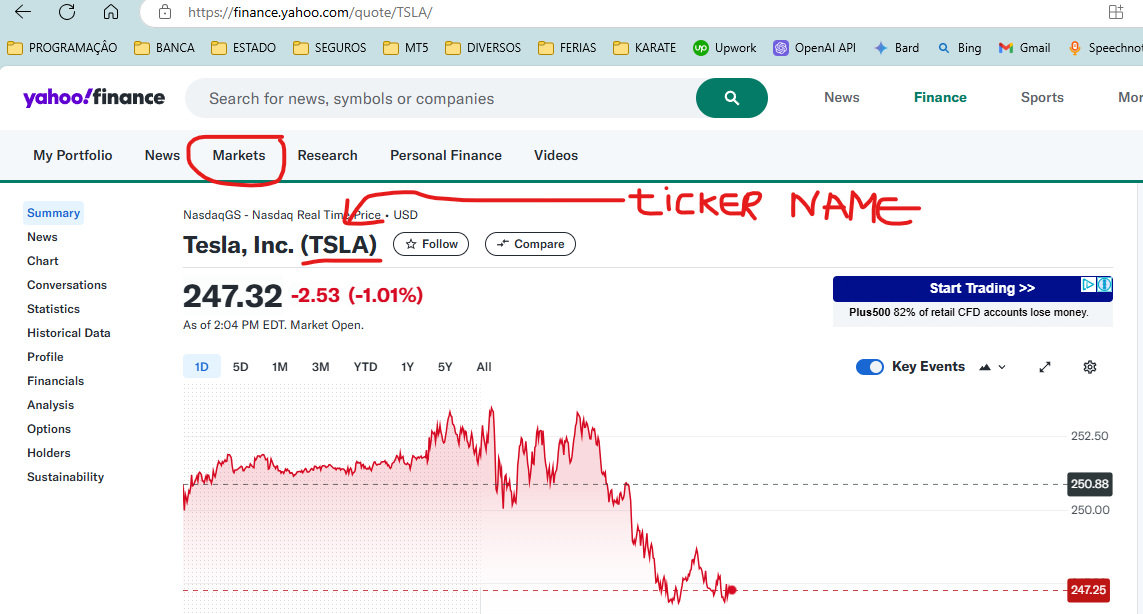

In [5]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600
2014-11-06 00:00:00+00:00,24.233509,27.174999,27.197500,26.950001,27.150000,139874000
2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000
2014-11-10 00:00:00+00:00,24.262487,27.207500,27.332500,27.167500,27.254999,108782000
2014-11-11 00:00:00+00:00,24.456450,27.424999,27.437500,27.100000,27.174999,109769200
...,...,...,...,...,...,...
2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200
2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900


In [6]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600
2014-11-06 00:00:00+00:00,24.233509,27.174999,27.197500,26.950001,27.150000,139874000
2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000
2014-11-10 00:00:00+00:00,24.262487,27.207500,27.332500,27.167500,27.254999,108782000
2014-11-11 00:00:00+00:00,24.456450,27.424999,27.437500,27.100000,27.174999,109769200


In [7]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200
2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900
2024-10-31 00:00:00+00:00,225.910004,225.910004,229.830002,225.369995,229.339996,64370100
2024-11-01 00:00:00+00:00,222.910004,222.910004,225.350006,220.270004,220.970001,65276700
2024-11-04 00:00:00+00:00,222.009995,222.009995,222.789993,219.710007,220.990005,44903300


### 2. Data Exploration & Visualization

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.shape

(2516, 6)

In [10]:
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [11]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,91.058820,93.086863,94.005953,92.078379,93.014297,1.192494e+08
std,63.746493,63.237283,63.844768,62.561998,63.186219,6.868630e+07
min,20.720037,22.584999,22.917500,22.367500,22.500000,2.404830e+07
25%,33.676715,36.028124,36.271876,35.838749,36.053125,7.334385e+07
50%,59.229197,61.045000,62.236250,59.952499,61.158749,1.022806e+08
75%,148.308434,150.172497,151.439995,148.295002,149.802502,1.454744e+08
max,236.479996,236.479996,237.490005,234.449997,236.479996,6.488252e+08


In [12]:
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object

In [13]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600
2014-11-06 00:00:00+00:00,24.233509,27.174999,27.197500,26.950001,27.150000,139874000
2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000
2014-11-10 00:00:00+00:00,24.262487,27.207500,27.332500,27.167500,27.254999,108782000
2014-11-11 00:00:00+00:00,24.456450,27.424999,27.437500,27.100000,27.174999,109769200


In [14]:
df.reset_index(inplace=True)

In [15]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600
1,2014-11-06 00:00:00+00:00,24.233509,27.174999,27.197500,26.950001,27.150000,139874000
2,2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000
3,2014-11-10 00:00:00+00:00,24.262487,27.207500,27.332500,27.167500,27.254999,108782000
4,2014-11-11 00:00:00+00:00,24.456450,27.424999,27.437500,27.100000,27.174999,109769200


Text(0, 0.5, 'Close price')

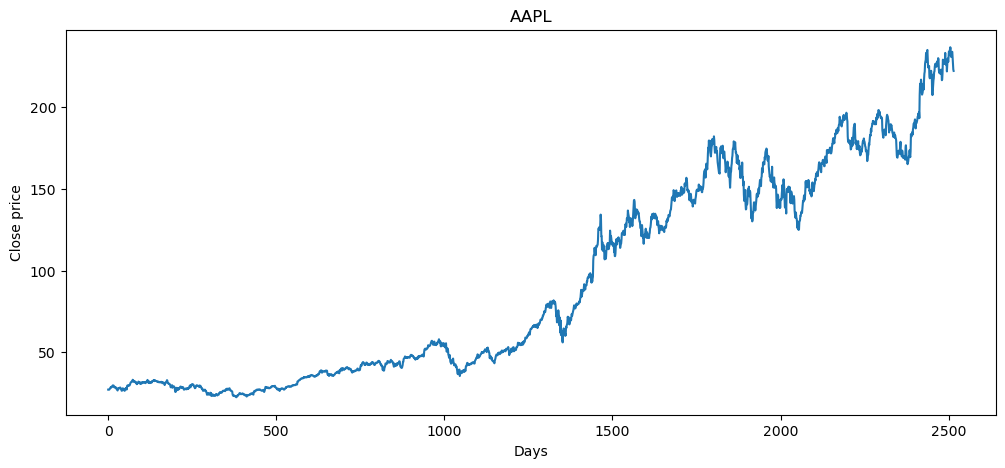

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

### 3. Feature Engineering

In [17]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA of 5 days ==> null null null null 30 40 ...... # Moving aveage

In [18]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[2:7])/5)

50.0


In [19]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [20]:
df1['Ma_5'] = df1.rolling(5).mean()
df1

,0,Ma_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


#### 100 days Moving Average

In [21]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600,NaN
1,2014-11-06 00:00:00+00:00,24.233509,27.174999,27.197500,26.950001,27.150000,139874000,NaN
2,2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000,NaN
3,2014-11-10 00:00:00+00:00,24.262487,27.207500,27.332500,27.167500,27.254999,108782000,NaN
4,2014-11-11 00:00:00+00:00,24.456450,27.424999,27.437500,27.100000,27.174999,109769200,NaN


In [22]:
df.head(103)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600,NaN
1,2014-11-06 00:00:00+00:00,24.233509,27.174999,27.197500,26.950001,27.150000,139874000,NaN
2,2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000,NaN
3,2014-11-10 00:00:00+00:00,24.262487,27.207500,27.332500,27.167500,27.254999,108782000,NaN
4,2014-11-11 00:00:00+00:00,24.456450,27.424999,27.437500,27.100000,27.174999,109769200,NaN
...,...,...,...,...,...,...,...,...
98,2015-03-30 00:00:00+00:00,28.284035,31.592501,31.600000,31.000000,31.012501,188398800,NaN
99,2015-03-31 00:00:00+00:00,27.849829,31.107500,31.622499,31.090000,31.522499,168362400,29.437175
100,2015-04-01 00:00:00+00:00,27.809530,31.062500,31.280001,30.775000,31.205000,162485600,29.475650


Text(0, 0.5, 'Price')

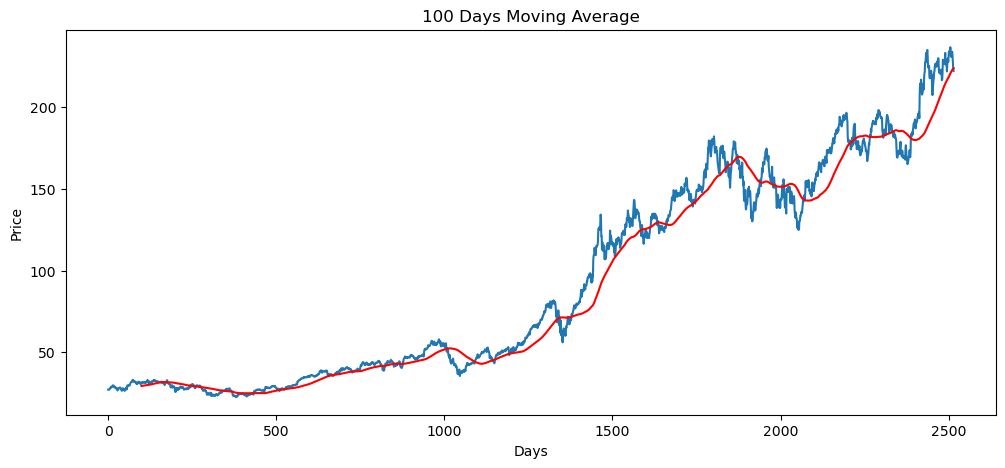

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

#### 200 days Moving Average

In [24]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600,NaN,NaN
1,2014-11-06 00:00:00+00:00,24.233509,27.174999,27.197500,26.950001,27.150000,139874000,NaN,NaN
2,2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000,NaN,NaN
3,2014-11-10 00:00:00+00:00,24.262487,27.207500,27.332500,27.167500,27.254999,108782000,NaN,NaN
4,2014-11-11 00:00:00+00:00,24.456450,27.424999,27.437500,27.100000,27.174999,109769200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
198,2015-08-20 00:00:00+00:00,25.433157,28.162500,28.587500,27.907499,28.520000,274006400,31.404800,NaN
199,2015-08-21 00:00:00+00:00,23.877586,26.440001,27.975000,26.412500,27.607500,513102000,31.358125,30.397650
200,2015-08-24 00:00:00+00:00,23.281549,25.780001,27.200001,23.000000,23.717501,648825200,31.305300,30.390475


Text(0, 0.5, 'Price')

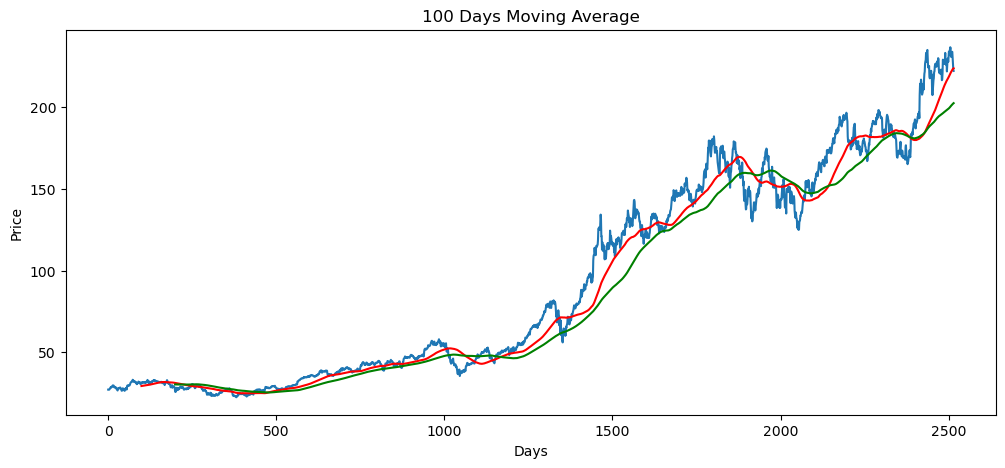

In [25]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

In [26]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600,NaN,NaN
1,2014-11-06 00:00:00+00:00,24.233509,27.174999,27.197500,26.950001,27.150000,139874000,NaN,NaN
2,2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000,NaN,NaN
3,2014-11-10 00:00:00+00:00,24.262487,27.207500,27.332500,27.167500,27.254999,108782000,NaN,NaN
4,2014-11-11 00:00:00+00:00,24.456450,27.424999,27.437500,27.100000,27.174999,109769200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2511,2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200,222.679200,201.53255
2512,2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900,223.011300,201.76490
2513,2024-10-31 00:00:00+00:00,225.910004,225.910004,229.830002,225.369995,229.339996,64370100,223.339200,201.98105


#### Calculating % Changer In Each Trading Session

In [27]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,27.215000,NaN
1,27.174999,-0.001470
2,27.252501,0.002852
3,27.207500,-0.001651
4,27.424999,0.007994
...,...,...
2511,233.669998,0.001157
2512,230.100006,-0.015278
2513,225.910004,-0.018209


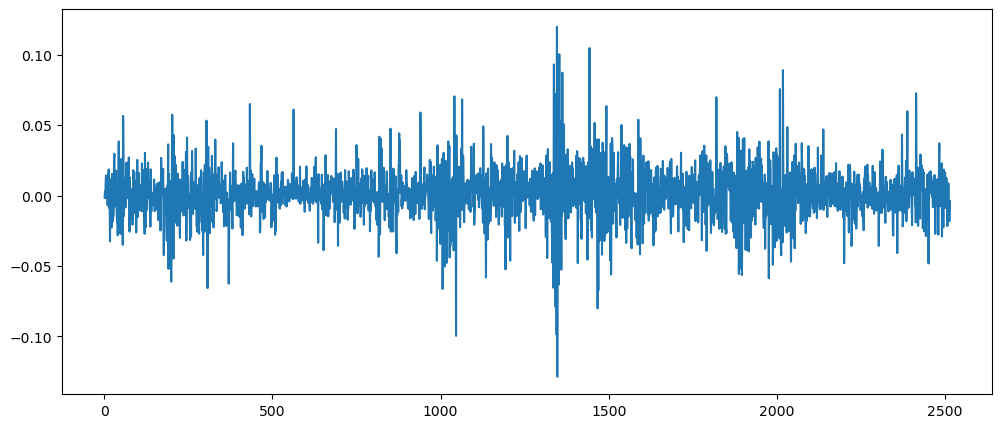

In [28]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

### 4. Data Preprocessing

In [29]:
# Install scikit-learn, keras and tensorflow on the 'stockenv' evironment
# conda install scikit-learn keras tensorflow

# It's normal if obtain a error when try installing the tensorflow, because the incompatibility of the python version
# In that case try to install with pip via jupyter notebook, or create a new conda env with the compatibel python version

In [30]:
df.shape

(2516, 10)

In [31]:
# Splitting Data into  Training & Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): len(df)])

print(data_training)
print(data_testing)

Ticker        AAPL
0        27.215000
1        27.174999
2        27.252501
3        27.207500
4        27.424999
...            ...
1756    148.850006
1757    152.570007
1758    149.800003
1759    148.960007
1760    150.020004

[1761 rows x 1 columns]
Ticker        AAPL
1761    151.490005
1762    150.960007
1763    151.279999
1764    150.440002
1765    150.809998
...            ...
2511    233.669998
2512    230.100006
2513    225.910004
2514    222.910004
2515    222.009995

[755 rows x 1 columns]


In [32]:
data_training

Ticker,AAPL
0,27.215000
1,27.174999
2,27.252501
3,27.207500
4,27.424999
...,...
1756,148.850006
1757,152.570007
1758,149.800003
1759,148.960007


In [33]:
data_testing

Ticker,AAPL
1761,151.490005
1762,150.960007
1763,151.279999
1764,150.440002
1765,150.809998
...,...
2511,233.669998
2512,230.100006
2513,225.910004
2514,222.910004


In [34]:
# Scaling down the data between 0 and 1

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [36]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03452519],
       [0.03422691],
       [0.03480483],
       ...,
       [0.94862235],
       [0.94235863],
       [0.95026287]])

In [37]:
type(data_training_array)

numpy.ndarray

In [38]:
data_training_array.shape

(1761, 1)

### 5. Sequence Creation

In [39]:
# Tomorrow stoc price is dependent on previous few days stock price

In [40]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [41]:
x_train.ndim

3

In [42]:
y_train.ndim

1

In [43]:
x_train.shape

(1661, 100, 1)

In [44]:
y_train.shape

(1661,)

### 6. Building Machine Learning Model

In [45]:
# It's normal if obtain a error when try installing the tensorflow, because the incompatibility of the python version
# In that case try to install with pip via jupyter notebook, or create a new conda env with the compatibel python version
# !pip install tensorflow

In [46]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [47]:
import sys
print(sys.executable)

C:\Users\rocha\anaconda3\envs\stockenv\python.exe


In [48]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [49]:
model = Sequential()  # Model that accept sequencial data

model.add(Input(shape=(100, 1))) # that means that accept the last 100 sequencial data, in this case the close Price
model.add(LSTM(units=128, activation='tanh', return_sequences=True)) # i want that layer has 128 neurons
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

### 7. Model Training

In [51]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 9s 83ms/step - loss: 0.0109
Epoch 2/50
52/52 [==============================] - 5s 87ms/step - loss: 4.6173e-04
Epoch 3/50
52/52 [==============================] - 5s 94ms/step - loss: 4.3568e-04
Epoch 4/50
52/52 [==============================] - 6s 111ms/step - loss: 4.3716e-04
Epoch 5/50
52/52 [==============================] - 5s 100ms/step - loss: 4.3218e-04
Epoch 6/50
52/52 [==============================] - 5s 90ms/step - loss: 3.9439e-04
Epoch 7/50
52/52 [==============================] - 5s 89ms/step - loss: 3.7498e-04
Epoch 8/50
52/52 [==============================] - 5s 89ms/step - loss: 3.5863e-04
Epoch 9/50
52/52 [==============================] - 5s 88ms/step - loss: 3.7338e-04
Epoch 10/50
52/52 [==============================] - 5s 95ms/step - loss: 3.3166e-04
Epoch 11/50
52/52 [==============================] - 5s 89ms/step - loss: 3.4449e-04
Epoch 12/50
52/52 [==============================] - 5s 90ms/step - loss: 3.

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Save the trained model
model.save('stock_prediction_model.keras')

In [ ]:
# from tensorflow.keras.models import load_model

# Load the previous saved trained model
# model = load_model('stock_prediction_model.keras')

### 8. Preparing Test Data

In [53]:
data_training.tail()

Ticker,AAPL
1756,148.850006
1757,152.570007
1758,149.800003
1759,148.960007
1760,150.020004


In [54]:
data_testing

Ticker,AAPL
1761,151.490005
1762,150.960007
1763,151.279999
1764,150.440002
1765,150.809998
...,...
2511,233.669998
2512,230.100006
2513,225.910004
2514,222.910004


In [55]:
past_100_days = data_training.tail(100)

In [56]:
past_100_days

Ticker,AAPL
1661,130.479996
1662,129.639999
1663,130.149994
1664,131.789993
1665,130.460007
...,...
1756,148.850006
1757,152.570007
1758,149.800003
1759,148.960007


In [57]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,130.479996
1,129.639999
2,130.149994
3,131.789993
4,130.460007
...,...
850,233.669998
851,230.100006
852,225.910004
853,222.910004


In [58]:
input_data = scaler.fit_transform(final_df)
input_data[:10]

array([[0.04898618],
       [0.04144987],
       [0.04602546],
       [0.06073925],
       [0.04880684],
       [0.06531497],
       [0.08038758],
       [0.07787547],
       [0.0752737 ],
       [0.07258213]])

In [59]:
input_data.shape

(855, 1)

In [60]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [61]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [62]:
x_test

array([[[0.04898618],
        [0.04144987],
        [0.04602546],
        ...,
        [0.22232197],
        [0.21478567],
        [0.22429578]],

       [[0.04144987],
        [0.04602546],
        [0.06073925],
        ...,
        [0.21478567],
        [0.22429578],
        [0.23748438]],

       [[0.04602546],
        [0.06073925],
        [0.04880684],
        ...,
        [0.22429578],
        [0.23748438],
        [0.23272932]],

       ...,

       [[0.61098151],
        [0.73685625],
        [0.7899696 ],
        ...,
        [0.97236675],
        [0.97478918],
        [0.94275983]],

       [[0.73685625],
        [0.7899696 ],
        [0.80046662],
        ...,
        [0.97478918],
        [0.94275983],
        [0.90516784]],

       [[0.7899696 ],
        [0.80046662],
        [0.78476592],
        ...,
        [0.94275983],
        [0.90516784],
        [0.87825236]]])

In [63]:
x_test[0]

array([[0.04898618],
       [0.04144987],
       [0.04602546],
       [0.06073925],
       [0.04880684],
       [0.06531497],
       [0.08038758],
       [0.07787547],
       [0.0752737 ],
       [0.07258213],
       [0.08756507],
       [0.10147143],
       [0.10712372],
       [0.10990497],
       [0.13403921],
       [0.15252115],
       [0.17539934],
       [0.1634668 ],
       [0.18024407],
       [0.17477125],
       [0.18499913],
       [0.2164902 ],
       [0.21047909],
       [0.191728  ],
       [0.15637897],
       [0.18957471],
       [0.18284584],
       [0.19540648],
       [0.21119685],
       [0.21505481],
       [0.19513734],
       [0.17907769],
       [0.18499913],
       [0.18697294],
       [0.18392255],
       [0.20043069],
       [0.1967522 ],
       [0.19773911],
       [0.18948504],
       [0.18903642],
       [0.18464032],
       [0.18697294],
       [0.21415757],
       [0.21604172],
       [0.23416471],
       [0.22582098],
       [0.19145886],
       [0.194

### 9. Making Prediction

In [64]:
y_predicted  = model.predict(x_test)

24/24 [==============================] - 2s 31ms/step


In [65]:
y_predicted

array([[0.22586475],
       [0.2323624 ],
       [0.23590936],
       [0.23858866],
       [0.23653938],
       [0.23559338],
       [0.22388247],
       [0.21440445],
       [0.21761377],
       [0.22278973],
       [0.23044103],
       [0.24537499],
       [0.2733969 ],
       [0.30357328],
       [0.32245508],
       [0.33092552],
       [0.33448827],
       [0.31243226],
       [0.30987468],
       [0.33477774],
       [0.35252717],
       [0.35648206],
       [0.34713364],
       [0.35482177],
       [0.38885242],
       [0.43047145],
       [0.4504089 ],
       [0.4787954 ],
       [0.47437608],
       [0.45842406],
       [0.47282988],
       [0.45009255],
       [0.42852548],
       [0.41235387],
       [0.4218474 ],
       [0.44487774],
       [0.46253628],
       [0.49008223],
       [0.49894828],
       [0.49909538],
       [0.49044713],
       [0.48102915],
       [0.49872017],
       [0.49989912],
       [0.47407228],
       [0.4436533 ],
       [0.42981967],
       [0.426

In [66]:
y_test

array([2.37484381e-01, 2.32729322e-01, 2.35600236e-01, 2.28063933e-01,
       2.31383466e-01, 2.05454887e-01, 2.05006268e-01, 2.24026638e-01,
       2.24116307e-01, 2.33088135e-01, 2.55428038e-01, 2.94724554e-01,
       3.18769125e-01, 3.22985896e-01, 3.26484903e-01, 3.31239961e-01,
       2.85214437e-01, 3.15987880e-01, 3.61385311e-01, 3.56630253e-01,
       3.47568618e-01, 3.30342724e-01, 3.61564786e-01, 4.14139569e-01,
       4.49129783e-01, 4.44464394e-01, 4.88336630e-01, 4.55051223e-01,
       4.42400911e-01, 4.86990910e-01, 4.23829161e-01, 4.13780757e-01,
       4.01309920e-01, 4.30378694e-01, 4.54153985e-01, 4.59895950e-01,
       4.96231883e-01, 4.86901104e-01, 4.87708673e-01, 4.77121844e-01,
       4.71469685e-01, 5.11304489e-01, 4.90579587e-01, 4.47694257e-01,
       4.21496535e-01, 4.23021729e-01, 4.23201204e-01, 4.49129783e-01,
       4.53167078e-01, 4.23201204e-01, 4.31096457e-01, 4.01758539e-01,
       3.69729046e-01, 3.54297490e-01, 3.35456732e-01, 3.28368911e-01,
      

In [68]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [69]:
y_predicted

array([150.19489 , 150.91911 , 151.31445 , 151.6131  , 151.38467 ,
       151.27924 , 149.97394 , 148.91751 , 149.27524 , 149.85214 ,
       150.70496 , 152.36949 , 155.49283 , 158.85628 , 160.96083 ,
       161.90497 , 162.30206 , 159.8437  , 159.55862 , 162.33432 ,
       164.31267 , 164.75348 , 163.71152 , 164.56844 , 168.3615  ,
       173.00034 , 175.22258 , 178.38654 , 177.89395 , 176.11595 ,
       177.72162 , 175.18732 , 172.78345 , 170.98096 , 172.03911 ,
       174.60606 , 176.5743  , 179.64456 , 180.63278 , 180.64917 ,
       179.68524 , 178.6355  , 180.60735 , 180.73875 , 177.86009 ,
       174.4696  , 172.9277  , 172.59085 , 174.30594 , 175.83307 ,
       174.74872 , 174.19255 , 172.18692 , 169.04938 , 166.41722 ,
       164.15694 , 162.74815 , 161.35121 , 160.6407  , 160.21178 ,
       165.48889 , 171.86778 , 175.28026 , 176.81885 , 175.3464  ,
       173.62448 , 172.28586 , 173.4556  , 175.3741  , 174.29955 ,
       171.47568 , 169.9688  , 171.56659 , 172.87952 , 171.587

In [70]:
y_test

array([151.49000549, 150.96000671, 151.27999878, 150.44000244,
       150.80999756, 147.91999817, 147.86999512, 149.99000549,
       150.        , 151.        , 153.49000549, 157.86999512,
       160.55000305, 161.02000427, 161.41000366, 161.94000244,
       156.80999756, 160.24000549, 165.30000305, 164.77000427,
       163.75999451, 161.83999634, 165.32000732, 171.17999268,
       175.08000183, 174.55999756, 179.44999695, 175.74000549,
       174.33000183, 179.30000305, 172.25999451, 171.13999939,
       169.75      , 172.99000549, 175.63999939, 176.27999878,
       180.33000183, 179.28999329, 179.38000488, 178.19999695,
       177.57000732, 182.00999451, 179.69999695, 174.91999817,
       172.        , 172.16999817, 172.19000244, 175.08000183,
       175.52999878, 172.19000244, 173.07000732, 169.80000305,
       166.22999573, 164.50999451, 162.41000366, 161.61999512,
       159.77999878, 159.69000244, 159.22000122, 170.33000183,
       174.77999878, 174.61000061, 175.83999634, 172.89

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

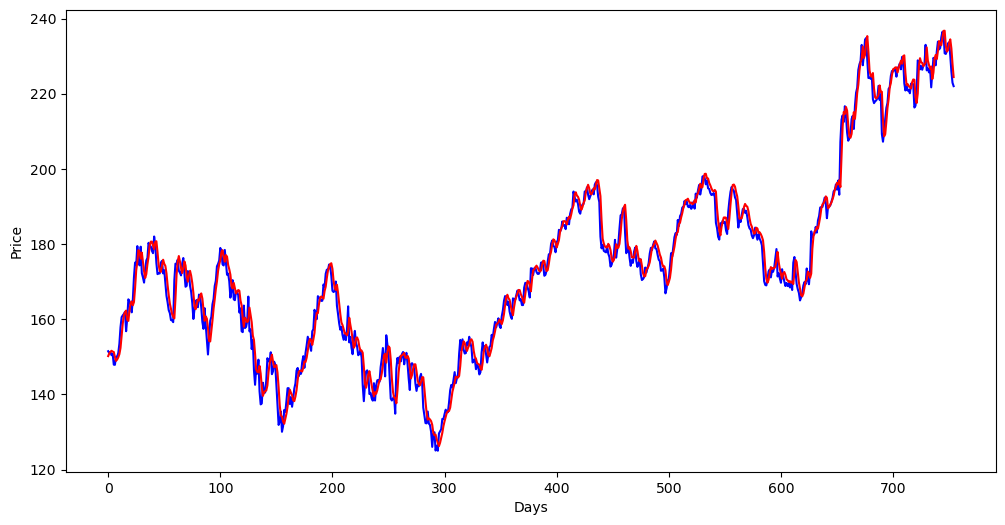

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend

(140.0, 240.0)

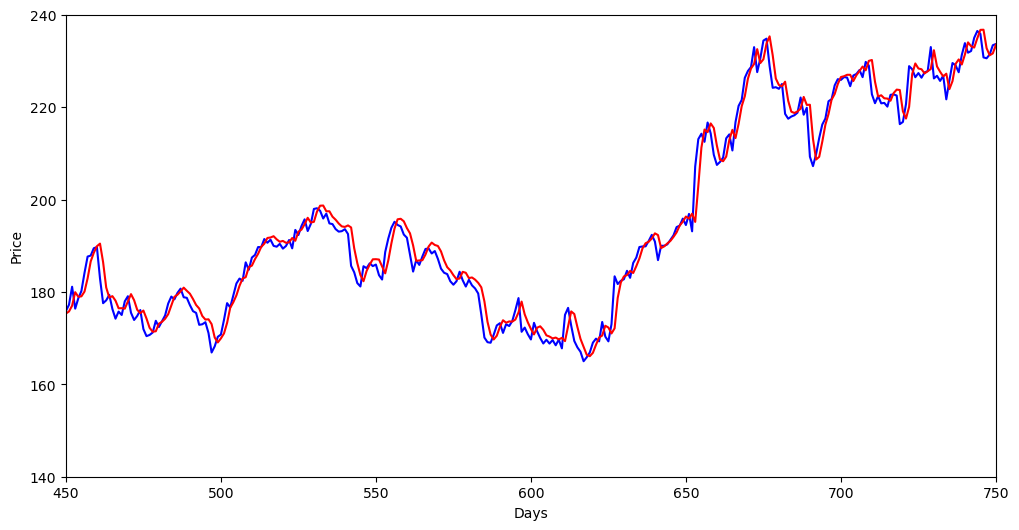

In [75]:
# Zoom one window of the previous graph
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend
plt.xlim(450, 750) # zoom x
plt.ylim(140, 240) # zoom y

### 10. Model Evaluation

In [84]:
# Means Squared Error (MSE
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error (MSE): {mse}')
# Low mse means greater accuracy

Mean Squared Error (MSE): 10.979068780258308


In [82]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 3.3134677877200356


In [85]:
# R-Squared (should be bettween 0 and 1, near 1 is very good
r2 = r2_score(y_test, y_predicted)
print(f'R-Squared: {r2}')

R-Squared: 0.982946660652644


### 11. Git Push

In [ ]:
git status
git add -A / or git add .
git commit -m 'stock prediction resources'
git push origin main